# Activity 1.3 : Regularization

## Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

## Intended Learning Outcomes (ILOs):

* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization

## Resources:

* Jupyter Notebook
* MNIST

## Procedures


Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:
y_train[333]

8

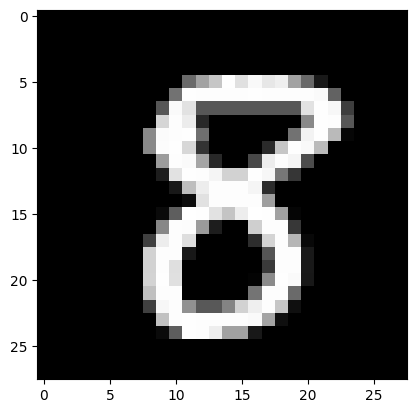

In [ ]:
#Check the actual image
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5088 - accuracy: 0.8476 - val_loss: 0.2097 - val_accuracy: 0.9337
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2546 - accuracy: 0.9248 - val_loss: 0.1558 - val_accuracy: 0.9527
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.2037 - accuracy: 0.9398 - val_loss: 0.1266 - val_accuracy: 0.9608
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1743 - accuracy: 0.9481 - val_loss: 0.1161 - val_accuracy: 0.9637
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1556 - accuracy: 0.9530 - val_loss: 0.1086 - val_accuracy: 0.9662
Epoch 6/30
469/469 [==============================] - 5s 11ms/step - loss: 0.1451 - accuracy: 0.9560 - val_loss: 0.0986 - val_accuracy: 0.9718
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1315 - accuracy: 0.9605 - val_loss: 0.1005 - val_accuracy: 0.9700
Epo

Use Keras evaluate function to evaluate performance on the test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09936724603176117
Test accuracy: 0.9761000275611877


Interpret the result

***The result shows the test loss and test accuracy. The lower the test loss the better because the goal is to minimize the loss function to measure the model's prediction in the test dataset. Since we have a lower test loss value which is 9.94 we expect that the test accuracy will be higher result. The accuracy in test dataset is 97.61 which means that the model performing better in testing dataset.***

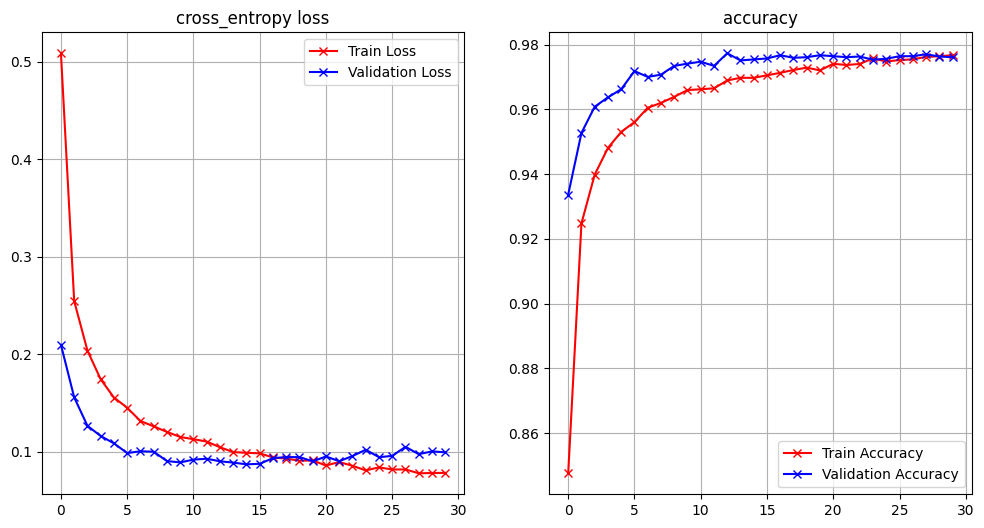

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

Interpret the result

*In the loss graph, the training and validation loss decrease over epochs, which is a good indication for a model because it is effectively learning from the data. As epochs progress, the lines of train loss and validation loss start to converge, reaching a point where the learning does not improve its performance. The validation loss slows down and begins to plateau after converging with the train loss, while the train loss begins to decrease at a slower rate.*

*In terms of accuracy, both training and validation loss increase, which means the model's predictions are becoming more precise over time. Like the graph of cross-entropy loss, both are converging and plateauing.*

*It is normal for models to learn a lot from the start and then make smaller incremental improvements as they approach optimal performance.*

## Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:


1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

### Breast Cancer Dataset

#### Data Preparation

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
data = load_breast_cancer()
x = data.data
y = data.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
x_test = (x_test - x_test.mean(axis=0)) / x_test.std(axis=0)

In [ ]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

#### Building Model

##### Model 1

In [ ]:
# Using keras.Sequential to create a model

model_1 = Sequential([
    Dense(400, activation='relu', input_shape=(x_train.shape[1],)), # First hidden layer
    Dropout(0.4),
    Dense(300, activation='relu'), # Second hidden layer
    Dropout(0.4),
    Dense(2, activation='softmax')
])

In [ ]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 400)               12400     
                                                                 
 dropout_18 (Dropout)        (None, 400)               0         
                                                                 
 dense_28 (Dense)            (None, 300)               120300    
                                                                 
 dropout_19 (Dropout)        (None, 300)               0         
                                                                 
 dense_29 (Dense)            (None, 2)                 602       
                                                                 
Total params: 133302 (520.71 KB)
Trainable params: 133302 (520.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**How many parameters does your model have?**

*Answer: Based on the model_1 summary the total params that the model_1 has 133,302 and also same with trainable params.*

**How does it compare with the previous model??**

*Answer: Based on the previous model build in the procedure the total params in the previous model only has 55,050*

In [ ]:
# Compile model_1
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_1.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(x_train,
                        y_train,
                        epochs=20,
                        batch_size=128,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/20
4/4 [==============================] - 1s 78ms/step - loss: 0.4283 - accuracy: 0.7978 - val_loss: 0.1258 - val_accuracy: 0.9561
Epoch 2/20
4/4 [==============================] - 0s 20ms/step - loss: 0.1516 - accuracy: 0.9451 - val_loss: 0.0914 - val_accuracy: 0.9737
Epoch 3/20
4/4 [==============================] - 0s 25ms/step - loss: 0.1179 - accuracy: 0.9692 - val_loss: 0.0776 - val_accuracy: 0.9825
Epoch 4/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0921 - accuracy: 0.9692 - val_loss: 0.0753 - val_accuracy: 0.9737
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 0.0760 - accuracy: 0.9780 - val_loss: 0.0702 - val_accuracy: 0.9737
Epoch 6/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0689 - accuracy: 0.9846 - val_loss: 0.0634 - val_accuracy: 0.9825
Epoch 7/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0609 - accuracy: 0.9758 - val_loss: 0.0638 - val_accuracy: 0.9825
Epoch 8/20
4/4 [===========

In [ ]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.08070261776447296
Test accuracy: 0.9736841917037964


***Analysis:*** *The results show that the test loss is 8.07, while the test accuracy is 97.37%. This indicates that the model is performing well on the testing dataset. The high accuracy in the testing dataset, even when using regularization techniques, is a positive sign of the model's performance.*

##### Model 2

In [ ]:
# Use at least two regularization techniques and apply it to the new model (model_2)

model_2 = Sequential([
    Dense(400, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer='l2'),
    Dropout(0.4),
    Dense(300, activation='relu', kernel_regularizer='l2'),
    Dropout(0.4),
    Dense(2, activation='softmax')
])

In [ ]:
# Train this model for your preferred epochs, learning rate, batch size and optimizer
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(x_train,
                        y_train,
                        epochs=20,
                        batch_size=128,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/20
4/4 [==============================] - 1s 129ms/step - loss: 4.4262 - accuracy: 0.7538 - val_loss: 3.9306 - val_accuracy: 0.9474
Epoch 2/20
4/4 [==============================] - 0s 41ms/step - loss: 3.8489 - accuracy: 0.9297 - val_loss: 3.5685 - val_accuracy: 0.9649
Epoch 3/20
4/4 [==============================] - 0s 70ms/step - loss: 3.5093 - accuracy: 0.9451 - val_loss: 3.2462 - val_accuracy: 0.9825
Epoch 4/20
4/4 [==============================] - 0s 42ms/step - loss: 3.1888 - accuracy: 0.9582 - val_loss: 2.9438 - val_accuracy: 0.9825
Epoch 5/20
4/4 [==============================] - 0s 36ms/step - loss: 2.8796 - accuracy: 0.9692 - val_loss: 2.6630 - val_accuracy: 0.9825
Epoch 6/20
4/4 [==============================] - 0s 31ms/step - loss: 2.6028 - accuracy: 0.9714 - val_loss: 2.4046 - val_accuracy: 0.9825
Epoch 7/20
4/4 [==============================] - 0s 28ms/step - loss: 2.3412 - accuracy: 0.9780 - val_loss: 2.1674 - val_accuracy: 0.9825
Epoch 8/20
4/4 [==========

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.5583292245864868
Test accuracy: 0.9824561476707458


***Analysis:*** *The total loss of the test dataset reaches up to 55.83% while the accuracy of the test dataset is 98.25% whihc is pretty high and it means that the model's performance is good and it can predict if the data is has breast cancer or not*

#### Visualization

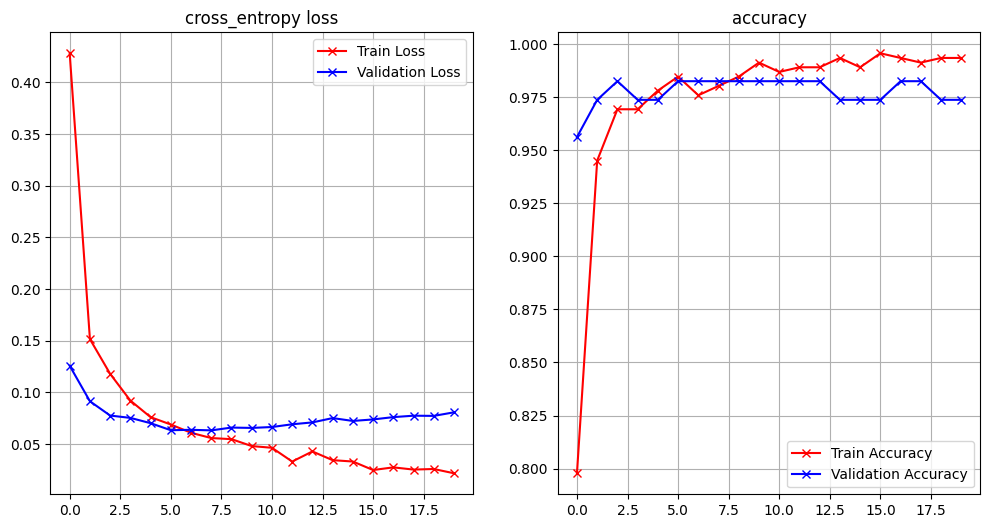

In [ ]:
# Compare the accuracy and loss (training and validation) of model_1 and model_2
plot_loss_accuracy(history_1)

***Interpretation:*** *In the graph of cross_entropy loss it shows that the training loss decreases over epoch this means the model means that (add more) while the validation loss it start from lower then ir slowly to plateau and little by little it increases the value of loss.
In the acccuracy graph, the training set increases sharply and then it slowly increases while the validation accuracy it starts with high accuracy then there are times where the accuracy gets plateau and the decreases sometimes.*

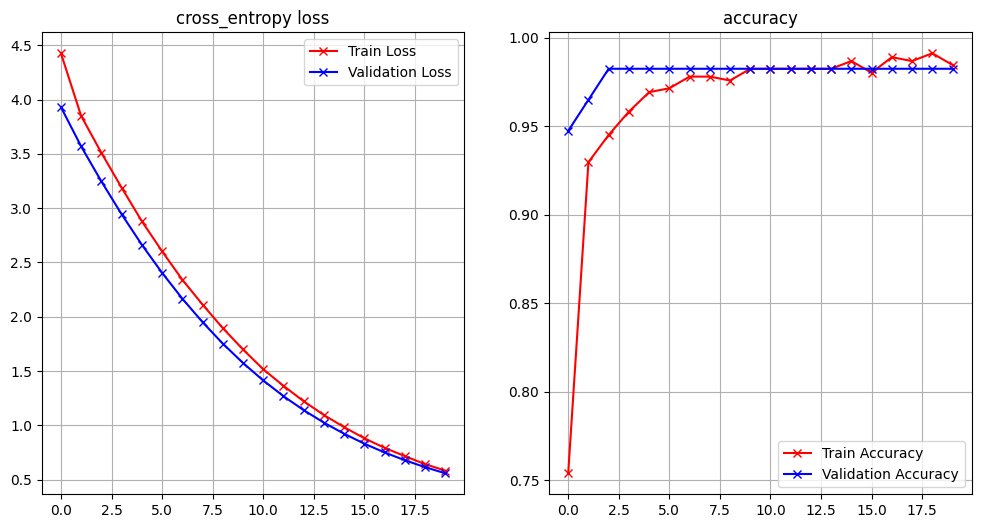

In [ ]:
plot_loss_accuracy(history_2)

**Interpretation:** *The cross_entropy loss graph shows the that the training and validation dataset decreases over epochs and the validation loss fluctuates but appears to show similar in decreasing trend over epochs, which is good sign because the model shows that is learning and improving performance and not overfitting to the training data. When it comes to the graph of accuracy, the training accuracy starts around 75% and increases over epochs this means that the model is performing well in the training data while the validation accuracy starts around 95% and it increases and then it plateau near 100%. This could means the model's performance has stopped improving in validation dataset.*

## Conclusion

In conclusion, this acitivity help us to understand what regularization do, if prevents to overfitting the model. The regularization techniques discourage the model from havinf fitting noise or irrelevant information int he training data and leading to simplier and more generalizable model. The regularization alo helps the model learn from the training dtaa and allowing it to perform well on the unseed data. It also helps to reduce the variance of the model's predictions.

In the supplementary activity, I use the L1 and L2 regularization techniques and the dropout technique. In the first model I build the accuracy of the testing dataset is around 97% this model has only dropout technique while in the second model I build it has dropout and l2 regularization technique, after executing the model it reaches the accuracy of 98% which is 1% higher from the model1.

In this activity, I learn how to implement the regularization technique and how it affects the model performance on predicting the data. This regularization technique helps the data to not overfit and becomes complex.